``cv2.matchShapes()`` help match contours based on __Hu Moments__. Three implemented methods ``cv2.CONTOURS_MATCH_I1``, and ``cv2.CONTOURS_MATCH_I2``, and ``cv2.CONTOURS_MATCH_I3``

$$m_{i}^A = sign(h_{i}^A) ⋅ log h_{i}^A$$
$$m_{i}^B = sign (h_{i}^B) ⋅ h_{i}^B$$

$h_{i}^A, h_{i}^B$ are the Hu moments of $A$ and $B$, respectively

``cv2.CONTOURS_MATCH_I1`` 

$$I_{1} (A, B) = \sum_{i = 1 \cdots 7} \lvert \frac{1}{m_{i}^A} - \frac{1}{m_{i}^B} \rvert

``cv2.CONTOURS_MATCH_I2``

$$I_{2}(A, B) = \sum_{i = 1\cdots 7} \lvert m_{i}^A - m_{i}^B \rvert$$

In [31]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

In [32]:
def get_position_to_draw(text, point, font_face, font_scale, thickness):

    text_size = cv2.getTextSize(text, font_face, font_scale, thickness)[0]
    text_x = point[0] - text_size[0] /2
    text_y = point[1] + text_size[1] /2

    return round(text_x), round(text_y)

In [33]:
def build_circle_image():
    """Build a Circle Image"""

    img = np.zeros((500, 500, 3), dtype="uint8")
    cv2.circle(img, (250, 250), 200, (255, 255, 255), 1)

    return img 

In [34]:
def img_plt(color_img, title, pos):

    img_RGB = color_img[:, :, ::-1]
    ax  = plt.subplot(2, 2, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')

fig = plt.figure(figsize=(12, 9))
plt.rcParams['figure.facecolor'] = 'silver'

<Figure size 864x648 with 0 Axes>

In [35]:
#Loading the IMAGE
image = cv2.imread("images/match_shapes.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image_circle = build_circle_image()
gray_image_circle = cv2.cvtColor(image_circle, cv2.COLOR_BGR2GRAY)

In [36]:
ret, thresh = cv2.threshold(gray_image, 70, 255, cv2.THRESH_BINARY_INV)
ret, thresh_circle = cv2.threshold(gray_image_circle, 70, 255, cv2.THRESH_BINARY)

In [37]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours_circle, hierarchy_2 = cv2.findContours(thresh_circle, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [38]:
result_1 = image.copy()
result_2 = image.copy()
result_3 = image.copy()

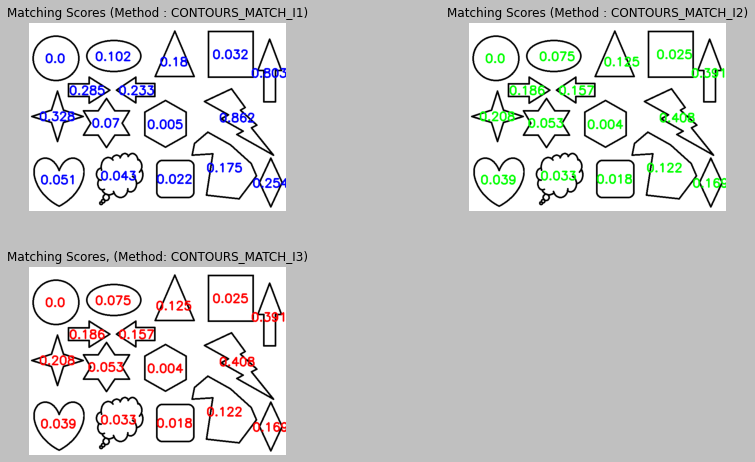

In [39]:
for contour in contours:
    #computing the moment of Contour
    M = cv2.moments(contour)

    #Center of Centroid
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    #we match each contour against the circle contour using the three matching modes
    ret_1 = cv2.matchShapes(contours_circle[0], contour, cv2.CONTOURS_MATCH_I1, 0.0)
    ret_2 = cv2.matchShapes(contours_circle[0], contour, cv2.CONTOURS_MATCH_I2, 0.0)
    ret_3 = cv2.matchShapes(contours_circle[0], contour, cv2.CONTOURS_MATCH_I3, 0.0)

    (x_1, y_1) = get_position_to_draw(str(round(ret_1, 3)), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 1.2, 3)
    (x_2, y_2) = get_position_to_draw(str(round(ret_2, 3)), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 1.2, 3)
    (x_3, y_3) = get_position_to_draw(str(round(ret_3, 3)), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 1.2, 3)

    cv2.putText(result_1, str(round(ret_1, 3)), (x_1, y_1), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 0, 0), 3)
    cv2.putText(result_2, str(round(ret_3, 3)), (x_2, y_2), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 3)
    cv2.putText(result_3, str(round(ret_3, 3)), (x_3, y_3), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3)

img_plt(result_1, "Matching Scores (Method : CONTOURS_MATCH_I1)", 1)
img_plt(result_2, "Matching Scores (Method : CONTOURS_MATCH_I2)", 2)
img_plt(result_3, "Matching Scores, (Method: CONTOURS_MATCH_I3)", 3)

plt.subplots_adjust(top=3,bottom=1.5, right=2, left=0.2, wspace=0.3, hspace=0.3)
plt.show()